In [1]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Atur beberapa opsi display pandas agar output lebih rapi
pd.set_option('display.max_columns', None)

print("Semua library berhasil di-import!")

# Definisikan path ke file data kita
# Menggunakan '../' karena notebook ada di dalam folder 'notebooks',
# dan kita perlu "naik" satu level untuk mengakses folder 'data'.
file_path = r"D:\ASAH\ML-LeadScoringPrediction\data\bank-additional-full.csv"

# Baca file CSV dengan separator titik koma (;)
try:
    df = pd.read_csv(file_path, sep=';')
    print("Dataset berhasil dimuat!")
    print(f"Bentuk data (baris, kolom): {df.shape}")
except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di '{file_path}'. Pastikan path sudah benar.")

# Tampilkan 5 baris pertama untuk inspeksi awal
df.head()

Semua library berhasil di-import!
Dataset berhasil dimuat!
Bentuk data (baris, kolom): (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
# Tampilkan informasi ringkas tentang DataFrame
# Ini akan menunjukkan jumlah kolom, nama kolom, tipe data, dan nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Distribusi kelas target 'y':
y
no     36548
yes     4640
Name: count, dtype: int64

Distribusi kelas target 'y' (dalam %):
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


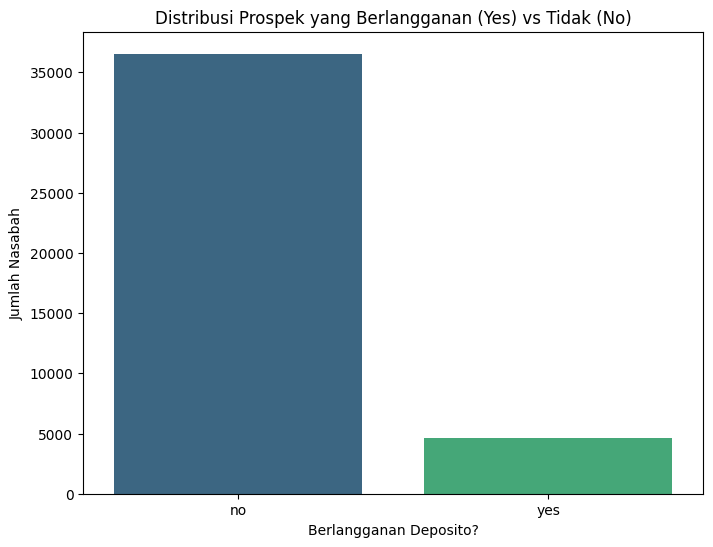

In [3]:
# A. Analisis Variabel Target (Kolom 'y')

# 1. Melihat distribusi kelas
print("Distribusi kelas target 'y':")
print(df['y'].value_counts())
print("\nDistribusi kelas target 'y' (dalam %):")
print(df['y'].value_counts(normalize=True) * 100)

# 2. Visualisasi distribusi kelas
plt.figure(figsize=(8, 6))
sns.countplot(x='y', hue='y', data=df, palette='viridis', legend=False)
plt.title('Distribusi Prospek yang Berlangganan (Yes) vs Tidak (No)')
plt.xlabel('Berlangganan Deposito?')
plt.ylabel('Jumlah Nasabah')
plt.show()




In [4]:
# B. Analisis Variabel Numerik

# Menampilkan ringkasan statistik (mean, std, min, max, dll.)
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# C. Analisis Variabel Kategorikal

# Memilih kolom dengan tipe data 'object' (kategorikal)
categorical_cols = df.select_dtypes(include=['object']).columns

# Menampilkan distribusi nilai unik untuk setiap kolom kategorikal
for col in categorical_cols:
    print(f"--- Distribusi untuk kolom: {col} ---")
    print(df[col].value_counts())
    print("\n")

--- Distribusi untuk kolom: job ---
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


--- Distribusi untuk kolom: marital ---
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


--- Distribusi untuk kolom: education ---
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


--- Distribusi untuk kolom: default ---
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


--- Distribusi untuk kolom: housing ---
housing
yes        21576
no  

In [6]:
# A. Menangani Class Imbalance: Menggunakan Class Weights

# Import library yang dibutuhkan
from sklearn.utils import class_weight
import numpy as np

# Hitung bobot kelas secara otomatis
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['y']),
    y=df['y']
)
# Ubah menjadi dictionary untuk kemudahan penggunaan
class_weight_dict = dict(zip(np.unique(df['y']), class_weights))

print("Bobot Kelas (Class Weights):", class_weight_dict)

Bobot Kelas (Class Weights): {'no': np.float64(0.5634781656999015), 'yes': np.float64(4.438362068965517)}


In [7]:
# B. Menangani Nilai Hilang ('unknown')

# 1. Kolom yang akan diisi
columns_to_impute = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# 2. Mengisi nilai 'unknown' dengan modus dari setiap kolom
for column in columns_to_impute:
    mode_value = df[column].mode()[0]  # Ambil modus pertama jika ada beberapa modus
    df[column] = df[column].replace('unknown', mode_value)

# 3. Verifikasi: Cek kembali distribusi nilai setelah imputasi
print("\n--- Distribusi setelah imputasi 'unknown' ---")
for col in columns_to_impute:
    print(f"--- Distribusi untuk kolom: {col} ---")
    print(df[col].value_counts())
    print("\n")


--- Distribusi setelah imputasi 'unknown' ---
--- Distribusi untuk kolom: job ---
job
admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64


--- Distribusi untuk kolom: marital ---
marital
married     25008
single      11568
divorced     4612
Name: count, dtype: int64


--- Distribusi untuk kolom: education ---
education
university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64


--- Distribusi untuk kolom: default ---
default
no     41185
yes        3
Name: count, dtype: int64


--- Distribusi untuk kolom: housing ---
housing
yes    22566
no     18622
Name: count, dtype: int64


--- Distribusi 

In [8]:
# C. Menangani Nilai Khusus (pdays = 999)

# Mengganti 999 dengan 0
df['pdays'] = df['pdays'].replace(999, 0)

# Verifikasi: Cek distribusi setelah penggantian
print("\n--- Distribusi pdays setelah penggantian 999 ---")
print(df['pdays'].value_counts())


--- Distribusi pdays setelah penggantian 999 ---
pdays
0     39688
3       439
6       412
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        26
15       24
14       20
8        18
16       11
17        8
18        7
22        3
19        3
21        2
25        1
26        1
27        1
20        1
Name: count, dtype: int64


In [9]:
# E. Feature Engineering

# 1. Durasi kontak dalam menit
df['duration_min'] = df['duration'] / 60

# 2. Drop kolom duration (karena sudah ada turunan feature)
df = df.drop(columns=['duration'])

# Verifikasi: tampilkan 5 baris pertama
print("\nDataFrame setelah feature engineering:")
df.head()


DataFrame setelah feature engineering:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_min
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.350000
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2.483333
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.766667
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2.516667
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.116667


In [10]:
# F. Encoding Variabel Kategorikal: One-Hot Encoding

# 1. Pilih kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

# 2. Lakukan one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, dummy_na=False) #dummy_na=False -> untuk menghapus kolom NaN

# 3. Tampilkan 5 baris pertama untuk melihat hasilnya
print("\nDataFrame setelah one-hot encoding:")
df.head()

# 4. Tampilkan informasi DataFrame lagi untuk memastikan tidak ada kolom yang hilang
df.info()


DataFrame setelah one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   duration_min                   41188 non-null  float64
 10  job_admin.                     41188 non-null  bool   
 11  job_blue-collar                41188 non-null  bool   
 12  job_entre

In [11]:
# G. Menyimpan DataFrame yang Sudah Bersih

# Tentukan path dan nama file untuk data yang sudah bersih
# Sebaiknya disimpan di folder 'data' yang sama dengan file asli
cleaned_file_path = r"D:\ASAH\ML-LeadScoringPrediction\data\bank_additional_cleaned.csv"

try:
    # Gunakan df.to_csv() untuk menyimpan DataFrame ke file CSV
    # index=False penting agar tidak ada kolom indeks baru yang ditambahkan di file CSV
    df.to_csv(cleaned_file_path, index=False)
    
    # Cetak pesan konfirmasi jika berhasil
    print(f"DataFrame yang sudah bersih berhasil disimpan di:\n{cleaned_file_path}")

except Exception as e:
    # Cetak pesan error jika terjadi masalah
    print(f"Terjadi error saat menyimpan file: {e}")

DataFrame yang sudah bersih berhasil disimpan di:
D:\ASAH\ML-LeadScoringPrediction\data\bank_additional_cleaned.csv
